# <center>This notebook takes information from the Crowther Lab raster composite on the nematode sampling locations and runs a PCA on the values</center>

In [1]:
# options(warn=-1)
library(tidyverse)
library(ggfortify)
library(ggrepel)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0.9000     ✔ purrr   0.2.5     
✔ tibble  1.4.2          ✔ dplyr   0.7.5     
✔ tidyr   0.8.1          ✔ stringr 1.3.1     
✔ readr   1.1.1          ✔ forcats 0.3.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# Import the csv and clean the data
rawData = read.csv('/Users/DevinRouth/Downloads/20190404_Nematode_TotalNumber_CovarsSampled.csv')
str(rawData)

'data.frame':	1869 obs. of  79 variables:
 $ system.index                       : Factor w/ 1869 levels "00000005bc26e0c9a640_0",..: 986 936 1265 1776 66 763 967 682 1562 1559 ...
 $ Annual_Mean_Radiation              : num  140 143 153 151 150 ...
 $ Annual_Mean_Temperature            : num  18.1 19 19.7 19.5 18.9 ...
 $ Annual_Precipitation               : num  1519 1528 1614 1619 1616 ...
 $ Aridity_Index                      : num  10354 9590 10367 10575 10974 ...
 $ Bulk_Density_15cm                  : num  1236 1283 1334 1317 1239 ...
 $ CContent_15cm                      : num  25 27 19 17 27 16 35 19 20 23 ...
 $ CatIonExcCap_15cm                  : num  12 9 7 7 8 8 9 9 8 8 ...
 $ Clay_Content_15cm                  : num  34 40 37 36 35 33 38 39 43 42 ...
 $ CoOfVar_EVI_Hetero_1km             : num  445 285 676 1020 2026 ...
 $ Contrast_EVI_Hetero_1km            : num  76337 60339 139122 192497 738772 ...
 $ CorFragVolPerc_15cm                : num  1 1 4 3 2 3 2 3 2 1 ...
 $ 

In [3]:
# Select the variables of interest and select only the areas with complete data (for now)
variablesToRemove = c('.geo','WWF_Biome','latitude_209564535','longitude_209564535','Total_Numb','system.index')

subsettedVariables = select(rawData, select=-variablesToRemove)
cleanedData = subsettedVariables[complete.cases(subsettedVariables), ]
cleanedData = cleanedData[ , order(names(cleanedData))]

# Examine the structure and values for each observation
str(cleanedData)

'data.frame':	1869 obs. of  73 variables:
 $ Annual_Mean_Radiation              : num  140 143 153 151 150 ...
 $ Annual_Mean_Temperature            : num  18.1 19 19.7 19.5 18.9 ...
 $ Annual_Precipitation               : num  1519 1528 1614 1619 1616 ...
 $ Aridity_Index                      : num  10354 9590 10367 10575 10974 ...
 $ Bulk_Density_15cm                  : num  1236 1283 1334 1317 1239 ...
 $ CatIonExcCap_15cm                  : num  12 9 7 7 8 8 9 9 8 8 ...
 $ CContent_15cm                      : num  25 27 19 17 27 16 35 19 20 23 ...
 $ Clay_Content_15cm                  : num  34 40 37 36 35 33 38 39 43 42 ...
 $ Contrast_EVI_Hetero_1km            : num  76337 60339 139122 192497 738772 ...
 $ CoOfVar_EVI_Hetero_1km             : num  445 285 676 1020 2026 ...
 $ CorFragVolPerc_15cm                : num  1 1 4 3 2 3 2 3 2 1 ...
 $ Correlation_EVI_Hetero_1km         : num  4758 -1252 -609 2965 4760 ...
 $ Depth_to_Bedrock                   : num  197 200 200 200 200 2

In [4]:
# Run a PCA
pcaOutput = prcomp(cleanedData[,c(1:73)], center = TRUE,scale. = TRUE,retx=TRUE)
summary(pcaOutput)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5    PC6     PC7
Standard deviation     4.0145 3.6326 2.7435 2.35567 1.80721 1.7881 1.58407
Proportion of Variance 0.2208 0.1808 0.1031 0.07602 0.04474 0.0438 0.03437
Cumulative Proportion  0.2208 0.4015 0.5046 0.58066 0.62540 0.6692 0.70357
                           PC8     PC9   PC10    PC11    PC12    PC13    PC14
Standard deviation     1.51694 1.42478 1.3070 1.27280 1.19777 1.15165 1.03182
Proportion of Variance 0.03152 0.02781 0.0234 0.02219 0.01965 0.01817 0.01458
Cumulative Proportion  0.73509 0.76290 0.7863 0.80850 0.82815 0.84632 0.86090
                          PC15   PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     0.98406 0.9743 0.90112 0.84000 0.79283 0.72365 0.70521
Proportion of Variance 0.01327 0.0130 0.01112 0.00967 0.00861 0.00717 0.00681
Cumulative Proportion  0.87417 0.8872 0.89829 0.90796 0.91657 0.92374 0.93056
                          PC22    PC23    PC24    

In [5]:
pcaOutput$sdev^2

[1] 1.611640e+01 1.319588e+01 7.526700e+00 5.549199e+00 3.266024e+00
 [6] 3.197267e+00 2.509276e+00 2.301118e+00 2.029986e+00 1.708331e+00
[11] 1.620011e+00 1.434646e+00 1.326309e+00 1.064644e+00 9.683698e-01
[16] 9.493021e-01 8.120210e-01 7.056017e-01 6.285759e-01 5.236637e-01
[21] 4.973148e-01 4.570628e-01 4.400981e-01 3.719029e-01 3.386142e-01
[26] 3.281699e-01 2.979863e-01 2.803792e-01 2.626979e-01 2.279006e-01
[31] 2.235068e-01 2.074880e-01 1.883642e-01 1.600983e-01 1.365092e-01
[36] 1.236104e-01 1.165725e-01 1.011929e-01 8.998619e-02 8.465310e-02
[41] 8.251060e-02 7.170172e-02 5.927601e-02 4.465050e-02 4.236629e-02
[46] 4.012826e-02 3.927931e-02 3.463389e-02 2.635003e-02 2.465539e-02
[51] 2.375150e-02 2.096040e-02 2.089407e-02 1.658548e-02 1.347948e-02
[56] 1.211785e-02 1.168422e-02 9.976893e-03 7.467886e-03 5.351066e-03
[61] 4.814966e-03 3.837787e-03 3.292811e-03 2.701322e-03 2.477393e-03
[66] 1.986354e-03 1.740070e-03 1.463253e-03 1.401767e-03 5.989680e-04
[71] 3.323979e-04 9.552270e-05 9.350820e-08

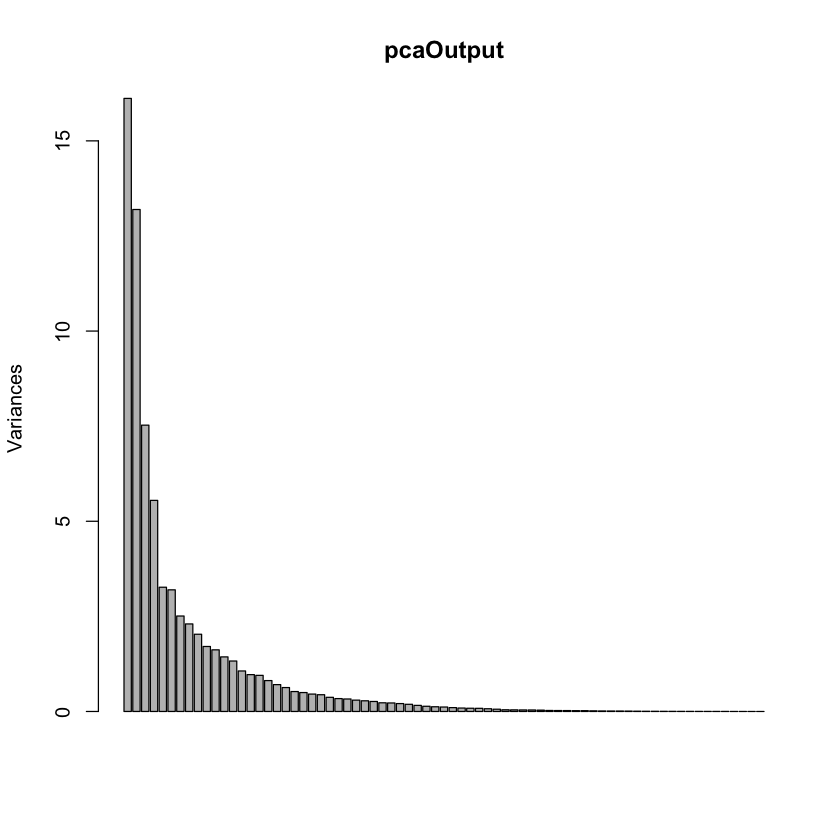

In [6]:
screeplot(pcaOutput,npcs=73)

In [7]:
# Examine the loadings for each Principal Component
pcaOutput$rotation

PC1           PC2           PC3          
Annual_Mean_Radiation            -0.211462635  -0.0836460832  0.0583100243
Annual_Mean_Temperature          -0.231601927   0.0631724592  0.0477405068
Annual_Precipitation             -0.114101503   0.1761512215 -0.1061488416
Aridity_Index                     0.042327771   0.1880317951 -0.1323575387
Bulk_Density_15cm                -0.129340240  -0.0875127501  0.1665895626
CatIonExcCap_15cm                 0.100885856  -0.0007866855 -0.0376170710
CContent_15cm                     0.113476531   0.0729288176 -0.1276588997
Clay_Content_15cm                -0.130865028   0.0166996251  0.0215583555
Contrast_EVI_Hetero_1km           0.057396946   0.0571690690  0.2591789699
CoOfVar_EVI_Hetero_1km            0.055324826  -0.0036195613  0.2343821165
CorFragVolPerc_15cm               0.022295820  -0.0231696729 -0.0580935512
Correlation_EVI_Hetero_1km       -0.005956447   0.0107460534  0.0571119748
Depth_to_Bedrock                 -0.021669211  -0.0356559693  0.0812062527
Dissimilarity_EVI_Hetero_1km      0.075120804   0.0978024430  0.2747551503
eastness                          0.001402361   0.0057385259 -0.0013537081
elevation                        -0.024428139  -0.0768069754 -0.0501390119
Entropy_EVI_Hetero_1km            0.026348523   0.1859593479  0.1590871560
Evenness_EVI_Hetero_1km           0.047365765   0.1525934076  0.1607085229
EVI                              -0.064725981   0.1749401292 -0.0668144487
Global_Biomass_IPCC              -0.102132408   0.0786044100 -0.1094023362
Gpp                              -0.114359724   0.1850047933 -0.1024478745
Highest_Weekly_Radiation         -0.065299943  -0.1350471074  0.1097026101
hillshade                        -0.004552399  -0.0097589308  0.0007657277
Homogeneity_EVI_Hetero_1km       -0.076451073  -0.1691289147 -0.2246200724
Human_Development                -0.033874312   0.0435114508  0.1556107429
Isothermality                    -0.198230498   0.0696175663 -0.0223018549
Lowest_Weekly_Radiation          -0.222346497  -0.0318589724  0.0159250521
Max_Temperature_of_Warmest_Month -0.209738735  -0.0683069362  0.0778268367
Maximum_EVI_Hetero_1km           -0.038848573  -0.1871972191 -0.1602169719
Mean_Diurnal_Range               -0.118846121  -0.1556940741  0.0741044023
⋮                                ⋮             ⋮             ⋮            
northness                         0.0437230422 -0.003139162  -0.014802328 
Npp                              -0.0732984485  0.181699283  -0.069525507 
OrgCStockTHa_0to15cm              0.1454510298  0.089485593  -0.134963055 
PET                              -0.2312805852 -0.027906225   0.050268913 
pHinHOX_15cm                     -0.0607025828 -0.162100770   0.137692198 
Population_Density               -0.0095295067  0.014889429   0.054850281 
Precipitation_of_Coldest_Quarter -0.0910665260  0.124528959  -0.075372747 
Precipitation_of_Driest_Month     0.0060955269  0.177819370  -0.123055593 
Precipitation_of_Driest_Quarter   0.0004339041  0.182535352  -0.123223051 
Precipitation_of_Warmest_Quarter -0.0784379308  0.110585652  -0.078766729 
Precipitation_of_Wettest_Month   -0.1288443854  0.102051143  -0.060450360 
Precipitation_of_Wettest_Quarter -0.1343647265  0.115607550  -0.066651290 
Precipitation_Seasonality        -0.1141142251 -0.131881898   0.054849060 
PredProb_of_R_Horizon             0.0582737858  0.013485780  -0.099780158 
Radiation_of_Coldest_Quarter     -0.2226647081 -0.034139586   0.015376782 
Radiation_of_Driest_Quarter      -0.1601766357 -0.005321298   0.078671480 
Radiation_of_Warmest_Quarter     -0.1008475119 -0.131725764   0.100371419 
Radiation_of_Wettest_Quarter     -0.0453257081 -0.096428036  -0.012763957 
Radiation_Seasonality             0.2233876240  0.002913334  -0.007779754 
Range_EVI_Hetero_1km              0.0732064394  0.099815814   0.274570350 
Sand_Content_15cm                 0.0236747364 -0.008289202  -0.017209720 
Shannon_Index_1km                 0.0610331378  0.17164123

In [8]:
write.csv(pcaOutput$rotation,'/Users/DevinRouth/Downloads/20190404_Nematode_PCA_Output.csv')

In [9]:
str(pcaOutput)

List of 5
 $ sdev    : num [1:73] 4.01 3.63 2.74 2.36 1.81 ...
 $ rotation: num [1:73, 1:73] -0.2115 -0.2316 -0.1141 0.0423 -0.1293 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:73] "Annual_Mean_Radiation" "Annual_Mean_Temperature" "Annual_Precipitation" "Aridity_Index" ...
  .. ..$ : chr [1:73] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:73] 126.5 11.2 946.9 10918.6 1275.4 ...
  ..- attr(*, "names")= chr [1:73] "Annual_Mean_Radiation" "Annual_Mean_Temperature" "Annual_Precipitation" "Aridity_Index" ...
 $ scale   : Named num [1:73] 33.02 7.07 574.36 5450.64 154.41 ...
  ..- attr(*, "names")= chr [1:73] "Annual_Mean_Radiation" "Annual_Mean_Temperature" "Annual_Precipitation" "Aridity_Index" ...
 $ x       : num [1:1869, 1:73] -5.31 -6.22 -6.21 -5.69 -4.59 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:1869] "1" "2" "3" "4" ...
  .. ..$ : chr [1:73] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


In [10]:
unname(pcaOutput$center)

[1]  1.264924e+02  1.123645e+01  9.468566e+02  1.091861e+04  1.275423e+03
 [6]  1.838791e+01  4.392188e+01  2.019797e+01  2.321522e+05  8.228106e+02
[11]  9.865169e+00  2.167007e+03  1.935463e+02  3.317922e+04 -2.219637e-04
[16]  3.505057e+02  2.667104e+04  9.298791e+03  3.189550e+03  2.871931e+03
[21]  1.191777e+04  2.067635e+02  1.803078e+02  3.107361e+03  3.836758e+01
[26]  3.760138e+01  5.314193e+01  2.378839e+01  1.342675e+03  9.004539e+00
[31]  3.649991e+00  8.046870e+00  1.891023e+01  1.366145e+01 -2.316907e+00
[36]  8.865228e+02  2.688591e+03  6.208019e+02  9.148295e+02  2.711381e+03
[41]  1.890398e+03  1.066795e+03  5.245119e+03  4.203244e-02  6.650785e+03
[46]  4.425415e+01  9.185943e+02  5.901605e+01  3.453588e+02  2.187662e+02
[51]  3.869502e+01  1.330246e+02  2.702327e+02  1.343724e+02  3.623157e+02
[56]  4.108517e+01  1.738256e+01  6.742822e+01  1.260875e+02  1.847493e+02
[61]  1.328623e+02  4.745585e-01  1.285611e+03  4.839112e+01  1.982370e+04
[66]  3.179187e+01  8.291729e+03  4.191855e+00  3.692905e+02  2.610519e+01
[71]  6.234154e+02  8.670845e+02  1.624005e+05

In [11]:
unname(pcaOutput$scale)

[1] 3.301854e+01 7.067201e+00 5.743615e+02 5.450637e+03 1.544133e+02
 [6] 8.412663e+00 4.011503e+01 9.163713e+00 2.653365e+05 6.490102e+02
[11] 6.279109e+00 1.740114e+03 2.169549e+01 1.761023e+04 3.762313e-01
[16] 5.657353e+02 3.624534e+03 7.051093e+02 1.333804e+03 4.332137e+03
[21] 6.229302e+03 2.979144e+01 1.150588e+01 1.425653e+03 3.395401e+01
[26] 1.473543e+01 4.514816e+01 5.652257e+00 9.220245e+02 2.428543e+00
[31] 9.990912e+00 1.099960e+01 4.890564e+00 7.233444e+00 1.041740e+01
[36] 6.641943e+02 6.149200e+02 6.198946e+02 5.972522e+02 6.578419e+02
[41] 7.116991e+02 6.555678e+02 1.792853e+03 4.091807e-01 3.303430e+03
[46] 2.574929e+01 3.753354e+02 9.011755e+00 1.600436e+03 2.257861e+02
[51] 2.874331e+01 9.505037e+01 2.056989e+02 1.185641e+02 2.881033e+02
[56] 2.896930e+01 1.494102e+01 4.549382e+01 6.012547e+01 3.031159e+01
[61] 5.626197e+01 2.191523e-01 6.762751e+02 1.661040e+01 3.666982e+03
[66] 1.178179e+01 9.596590e+02 6.053753e+00 2.050548e+02 8.846568e+00
[71] 2.958399e+02 7.615929e+02 1.898718e+05

In [12]:
pcaScores = pcaOutput$x

In [13]:
# Make convex hulls for every desired pair of principal component axes
pc_1_2 = chull(pcaScores[,c(1,2)])
pc_1_2_Coordinates = pcaScores[pc_1_2,c(1,2)]
pc_1_2_Coordinates

PC1         PC2        
1554  12.0509463 -11.5483234
493   -2.8072865 -20.2457138
95    -7.5259278 -16.9746590
513  -13.2122994   9.2694734
1662  -0.2734382   8.8936716
1670   1.3866419   8.5633878
1669   2.2510555   8.2446601
554    9.0236218   0.4733894
535   10.2802565  -0.9944344

In [14]:
pc_1_3 = chull(pcaScores[,c(1,3)])
pc_1_3_Coordinates = pcaScores[pc_1_3,c(1,3)]
pc_1_3_Coordinates

PC1        PC3      
1554  12.050946 -5.889557
1868  -1.895284 -9.116918
493   -2.807287 -8.931402
513  -13.212299 -6.460664
122   -9.067666  5.592987
121   -8.197192  7.078961
282   -2.663824 12.450385
1717  -1.574550 12.362167
931    3.779572 10.010288
554    9.023622  4.750271

In [15]:
pc_1_4 = chull(pcaScores[,c(1,4)])
pc_1_4_Coordinates = pcaScores[pc_1_4,c(1,4)]
pc_1_4_Coordinates

PC1         PC4        
1554  12.0509463  -5.7243338
1530  10.3892622  -8.6031211
895    5.8844246  -9.8454915
513  -13.2122994 -11.8643185
512  -12.3043363  -8.5854573
119   -9.3661197   0.3523116
136   -9.0971027   1.0024140
29    -7.4774870   2.2263315
1122   0.8875268   4.6943346
1526  10.0288277  -1.7280109

In [16]:
pc_2_3 = chull(pcaScores[,c(2,3)])
pc_2_3_Coordinates = pcaScores[pc_2_3,c(2,3)]
pc_2_3_Coordinates

PC2         PC3      
513    9.2694734 -6.460664
1663   8.1256240 -7.976065
1664   5.1977403 -8.173204
1868 -13.3208205 -9.116918
493  -20.2457138 -8.931402
417   -5.9915581  9.114936
282   -1.3448513 12.450385
1717  -0.9194817 12.362167
400    6.6009245  8.551002

In [17]:
pc_2_4 = chull(pcaScores[,c(2,4)])
pc_2_4_Coordinates = pcaScores[pc_2_4,c(2,4)]
pc_2_4_Coordinates

PC2         PC4         
1662   8.8936716  -5.35019584
513    9.2694734 -11.86431851
1530  -4.2224374  -8.60312108
1554 -11.5483234  -5.72433383
493  -20.2457138  -0.52629469
95   -16.9746590   1.29429937
1122   0.9189891   4.69433461
1229   1.7954217   4.05961323
1836   6.4937344  -0.01250255

In [18]:
pc_3_4 = chull(pcaScores[,c(3,4)])
pc_3_4_Coordinates = pcaScores[pc_3_4,c(3,4)]
pc_3_4_Coordinates

PC3       PC4        
282  12.450385  -3.6973578
400   8.551002  -6.6687864
895   1.136376  -9.8454915
513  -6.460664 -11.8643185
1663 -7.976065  -7.5850914
1868 -9.116918   0.8377606
1026 -2.637409   4.4779268
1122 -1.444917   4.6943346
1553  5.038778   2.2961854
1717 12.362167  -1.7357265

In [19]:
pc_1_5 = chull(pcaScores[,c(1,5)])
pc_1_5_Coordinates = pcaScores[pc_1_5,c(1,5)]
pc_1_5_Coordinates

PC1        PC5      
1554  12.050946 -1.824108
1533   9.468971 -6.972860
1592   3.731430 -7.092521
1575  -1.905569 -5.526811
513  -13.212299 -1.888607
95    -7.525928  5.622182
1868  -1.895284  9.129302
712    5.782023  4.680823
554    9.023622  2.529699

In [20]:
pc_2_5 = chull(pcaScores[,c(2,5)])
pc_2_5_Coordinates = pcaScores[pc_2_5,c(2,5)]
pc_2_5_Coordinates

PC2        PC5       
513    9.269473 -1.8886067
314    6.608287 -2.9437734
1533  -5.914480 -6.9728598
1592  -7.697469 -7.0925209
1527 -12.313426 -5.4768785
1563 -14.914344 -2.5049753
493  -20.245714  4.3130045
498  -19.188233  5.6676439
1868 -13.320820  9.1293020
212    2.664422  6.1827773
1675   6.253070  3.4176353
1671   8.426015  1.3380924
1662   8.893672  0.7583246

In [21]:
pc_3_5 = chull(pcaScores[,c(3,5)])
pc_3_5_Coordinates = pcaScores[pc_3_5,c(3,5)]
pc_3_5_Coordinates

PC3       PC5       
1587  4.215341 -5.5130515
1592  1.966377 -7.0925209
1533 -2.872626 -6.9728598
1527 -5.444574 -5.4768785
1663 -7.976065  0.7021183
493  -8.931402  4.3130045
1868 -9.116918  9.1293020
286   9.613853  6.1015666
282  12.450385  1.8289103
1717 12.362167  0.6663058

In [22]:
pc_4_5 = chull(pcaScores[,c(4,5)])
pc_4_5_Coordinates = pcaScores[pc_4_5,c(4,5)]
pc_4_5_Coordinates

PC4         PC5       
1328   3.0659139 -3.8874819
1592  -2.6475524 -7.0925209
1533  -3.7941801 -6.9728598
894   -9.0298241 -4.8687994
513  -11.8643185 -1.8886067
212   -5.5698471  6.1827773
1868   0.8377606  9.1293020
1026   4.4779268  1.4183240
1122   4.6943346  0.5777566

In [23]:
pc_1_6 = chull(pcaScores[,c(1,6)])
pc_1_6_Coordinates = pcaScores[pc_1_6,c(1,6)]
pc_1_6_Coordinates

PC1        PC6       
1554  12.050946 -0.7024863
1530  10.389262 -3.5011921
184    2.611730 -5.4343510
199   -6.789413 -4.8159667
513  -13.212299 -0.1296026
393   -5.903578  5.1237925
352   -3.826424  5.2800763
618    8.072632  1.7240333
535   10.280256  1.0185450

In [24]:
pc_2_6 = chull(pcaScores[,c(2,6)])
pc_2_6_Coordinates = pcaScores[pc_2_6,c(2,6)]
pc_2_6_Coordinates

PC2         PC6       
513    9.2694734 -0.1296026
1662   8.8936716 -2.7580628
1672   8.5957397 -3.8023705
1680   6.7581799 -4.4052152
184   -0.3339190 -5.4343510
199  -13.4684605 -4.8159667
493  -20.2457138  1.0615111
498  -19.1882328  1.7656389
352    0.6258683  5.2800763
392    1.9096925  5.1602478
374    4.8266072  4.2505147
373    5.0501824  4.1137808
1824   7.1319214  2.3440745

In [25]:
pc_3_6 = chull(pcaScores[,c(3,6)])
pc_3_6_Coordinates = pcaScores[pc_3_6,c(3,6)]
pc_3_6_Coordinates

PC3       PC6      
282  12.450385 -1.301959
1717 12.362167 -2.312388
1705 12.086511 -2.602813
184   1.476752 -5.434351
1680 -4.712045 -4.405215
1809 -5.562905 -4.241885
1681 -6.018718 -4.032050
1868 -9.116918 -1.154870
493  -8.931402  1.061511
498  -8.722856  1.765639
393   1.521720  5.123792
352   2.584449  5.280076
392   5.162863  5.160248
400   8.551002  2.412324

In [26]:
pc_4_6 = chull(pcaScores[,c(4,6)])
pc_4_6_Coordinates = pcaScores[pc_4_6,c(4,6)]
pc_4_6_Coordinates

PC4         PC6       
1409   3.0477401 -2.8948110
1365   2.8494984 -3.0568278
199    0.6088267 -4.8159667
184   -3.4102873 -5.4343510
1809  -6.7692761 -4.2418850
1530  -8.6031211 -3.5011921
513  -11.8643185 -0.1296026
392   -4.8600186  5.1602478
352   -3.2745425  5.2800763
209    0.7622236  4.5292994
1166   3.7482104  2.3263824
996    4.2205361  1.8527715
1122   4.6943346  0.9377970

In [27]:
pc_5_6 = chull(pcaScores[,c(5,6)])
pc_5_6_Coordinates = pcaScores[pc_5_6,c(5,6)]
pc_5_6_Coordinates

PC5         PC6       
1868  9.12930195 -1.1548695
215   3.57128424 -4.8620879
184   0.04627013 -5.4343510
177  -1.77697417 -5.0260671
894  -4.86879938 -2.7631657
1533 -6.97285979 -1.0245604
1592 -7.09252091  0.1548861
393  -2.41870156  5.1237925
352  -2.04067308  5.2800763
209   0.82774267  4.5292994
498   5.66764386  1.7656389

In [28]:
pc_1_7 = chull(pcaScores[,c(1,7)])
pc_1_7_Coordinates = pcaScores[pc_1_7,c(1,7)]
pc_1_7_Coordinates

PC1        PC7       
1530  10.389262 -0.3962808
1554  12.050946 -9.8196175
95    -7.525928 -9.5031048
513  -13.212299 -3.9548107
120   -9.108954  1.5013957
226   -5.246202  3.2373512
235   -4.851241  3.3988165
485    1.039871  5.4849013
480    2.677377  5.7696325
1534   8.013873  2.3507225

In [29]:
pc_2_7 = chull(pcaScores[,c(2,7)])
pc_2_7_Coordinates = pcaScores[pc_2_7,c(2,7)]
pc_2_7_Coordinates

PC2         PC7        
513    9.2694734 -3.95481069
1554 -11.5483234 -9.81961754
95   -16.9746590 -9.50310479
493  -20.2457138 -9.10673154
1563 -14.9143442 -1.62391482
1564 -12.9364565  0.15069765
1568  -9.0068355  3.30815674
484   -4.4320051  4.77807316
485   -2.0999992  5.48490126
480    0.2866293  5.76963247
488    3.9600354  3.47546207
1672   8.5957397 -0.07449474

In [30]:
pc_3_7 = chull(pcaScores[,c(3,7)])
pc_3_7_Coordinates = pcaScores[pc_3_7,c(3,7)]
pc_3_7_Coordinates

PC3        PC7      
1717 12.3621666 -2.931803
282  12.4503855 -5.704736
1554 -5.8895570 -9.819618
1868 -9.1169180 -9.564205
1664 -8.1732038 -1.540475
1663 -7.9760652 -1.185527
1681 -6.0187181  1.231916
482  -2.4272536  5.549470
480  -0.9780987  5.769632
431   3.1046360  4.045296
245   7.6348814  1.169213

In [31]:
pc_4_7 = chull(pcaScores[,c(4,7)])
pc_4_7_Coordinates = pcaScores[pc_4_7,c(4,7)]
pc_4_7_Coordinates

PC4         PC7        
95     1.2942994 -9.50310479
1868   0.8377606 -9.56420545
1554  -5.7243338 -9.81961754
513  -11.8643185 -3.95481069
1578  -8.1571442  2.96083264
431   -7.3566955  4.04529587
480   -5.7338749  5.76963247
485   -4.0343323  5.48490126
1764   1.0403012  3.02346184
996    4.2205361  0.60215917
1122   4.6943346 -0.05858652

In [32]:
pc_5_7 = chull(pcaScores[,c(5,7)])
pc_5_7_Coordinates = pcaScores[pc_5_7,c(5,7)]
pc_5_7_Coordinates

PC5       PC7       
1868  9.129302 -9.5642054
1554 -1.824108 -9.8196175
1527 -5.476879 -3.9868838
1533 -6.972860 -0.9628762
1592 -7.092521  1.3100050
484  -2.679927  4.7780732
480   1.932835  5.7696325
219   4.674076  3.3575542

In [33]:
pc_6_7 = chull(pcaScores[,c(6,7)])
pc_6_7_Coordinates = pcaScores[pc_6_7,c(6,7)]
pc_6_7_Coordinates

PC6        PC7       
392   5.1602478 -1.6511290
498   1.7656389 -9.0054064
1554 -0.7024863 -9.8196175
1868 -1.1548695 -9.5642054
199  -4.8159667 -3.5490373
184  -5.4343510  1.1030299
215  -4.8620879  2.5659719
481  -1.6445461  5.5382957
480  -1.2241714  5.7696325
1764  2.2866536  3.0234618
510   4.7086461  0.3558679
352   5.2800763 -1.2216923

In [34]:
pc_1_8 = chull(pcaScores[,c(1,8)])
pc_1_8_Coordinates = pcaScores[pc_1_8,c(1,8)]
pc_1_8_Coordinates

PC1        PC8      
1554  12.050946 -2.638843
1530  10.389262 -6.645818
615    7.772610 -7.186741
122   -9.067666 -4.663652
513  -13.212299 -2.207183
95    -7.525928  3.769149
498   -3.587543  6.688204
502   -1.546125  5.899590
1535   7.444511  2.015104
1534   8.013873  1.721323

In [35]:
pc_2_8 = chull(pcaScores[,c(2,8)])
pc_2_8_Coordinates = pcaScores[pc_2_8,c(2,8)]
pc_2_8_Coordinates

PC2         PC8      
513    9.2694734 -2.207183
894    0.3485539 -6.371388
615   -1.6551114 -7.186741
1530  -4.2224374 -6.645818
1533  -5.9144796 -6.163600
200  -12.9606447 -3.813843
493  -20.2457138  5.025696
498  -19.1882328  6.688204
374    4.8266072  4.542710
375    6.5286016  3.422885
1662   8.8936716 -0.169236

In [36]:
pc_3_8 = chull(pcaScores[,c(3,8)])
pc_3_8_Coordinates = pcaScores[pc_3_8,c(3,8)]
pc_3_8_Coordinates

PC3        PC8       
282  12.4503855 -3.2207581
615  -0.5251521 -7.1867405
894  -2.6839863 -6.3713884
1809 -5.5629054 -4.6597983
1663 -7.9760652 -0.2523626
1664 -8.1732038  0.2708404
1868 -9.1169180  4.1359909
498  -8.7228564  6.6882044
374   1.5314318  4.5427098
851   7.5671265  2.3759484
433   8.6619865  1.9740564
1717 12.3621666  0.6157349

In [37]:
pc_4_8 = chull(pcaScores[,c(4,8)])
pc_4_8_Coordinates = pcaScores[pc_4_8,c(4,8)]
pc_4_8_Coordinates

PC4         PC8       
1122   4.6943346 -1.4188193
29     2.2263315 -3.4375745
615   -4.2739373 -7.1867405
1530  -8.6031211 -6.6458179
894   -9.0298241 -6.3713884
513  -11.8643185 -2.2071831
374   -4.5785660  4.5427098
502   -2.0950683  5.8995899
498   -0.4038618  6.6882044
1003   2.8152620  2.0984608
1026   4.4779268 -0.4653118

In [38]:
pc_5_8 = chull(pcaScores[,c(5,8)])
pc_5_8_Coordinates = pcaScores[pc_5_8,c(5,8)]
pc_5_8_Coordinates

PC5        PC8       
212   6.1827773 -0.9453671
1530 -0.6512571 -6.6458179
615  -4.0336537 -7.1867405
1533 -6.9728598 -6.1636000
1592 -7.0925209 -2.3377822
1587 -5.5130515  0.9622279
404  -3.2943275  3.1258719
373  -1.6538930  4.2461886
374  -1.1997316  4.5427098
498   5.6676439  6.6882044
1868  9.1293020  4.1359909

In [39]:
pc_6_8 = chull(pcaScores[,c(6,8)])
pc_6_8_Coordinates = pcaScores[pc_6_8,c(6,8)]
pc_6_8_Coordinates

PC6        PC8       
209   4.5292994 -2.7120297
615  -2.1748981 -7.1867405
1530 -3.5011921 -6.6458179
177  -5.0260671 -3.6836760
184  -5.4343510 -2.8824061
169  -4.3322049  0.5232533
78   -4.0596457  0.9378157
150  -3.3385125  1.8652550
524  -2.8996834  2.3304671
1868 -1.1548695  4.1359909
502   0.6629734  5.8995899
498   1.7656389  6.6882044
374   4.2505147  4.5427098
352   5.2800763  3.4706635
392   5.1602478  1.0277771

In [40]:
pc_7_8 = chull(pcaScores[,c(7,8)])
pc_7_8_Coordinates = pcaScores[pc_7_8,c(7,8)]
pc_7_8_Coordinates

PC7        PC8       
480   5.7696325 -0.4509334
484   4.7780732 -2.5103076
1530 -0.3962808 -6.6458179
615  -2.6546170 -7.1867405
1554 -9.8196175 -2.6388427
1868 -9.5642054  4.1359909
498  -9.0054064  6.6882044
502  -3.9939310  5.8995899
412   2.1527225  2.9502606
1581  3.9765630  1.8251340

In [41]:
pc_1_9 = chull(pcaScores[,c(1,9)])
pc_1_9_Coordinates = pcaScores[pc_1_9,c(1,9)]
pc_1_9_Coordinates

PC1        PC9         
1554  12.050946  -0.49930208
535   10.280256  -1.80449127
581   10.070279  -1.93317605
727    6.757817  -3.94269479
726    6.757817  -3.94269479
513  -13.212299 -10.61137786
512  -12.304336  -7.95028928
1823  -9.552898  -0.05726222
1824  -8.808697   2.02725852
95    -7.525928   4.22523440
427   -3.489611   5.75362603
1669   2.251055   7.37614100
895    5.884425   7.70908345

In [42]:
pc_2_9 = chull(pcaScores[,c(2,9)])
pc_2_9_Coordinates = pcaScores[pc_2_9,c(2,9)]
pc_2_9_Coordinates

PC2        PC9        
1662   8.893672   1.7055772
513    9.269473 -10.6113779
1527 -12.313426  -0.4531575
502  -15.046051   1.1639995
500  -16.910920   2.3572218
425  -19.330376   4.3867949
493  -20.245714   5.8330161
895    2.649259   7.7090835
1669   8.244660   7.3761410

In [43]:
pc_3_9 = chull(pcaScores[,c(3,9)])
pc_3_9_Coordinates = pcaScores[pc_3_9,c(3,9)]
pc_3_9_Coordinates

PC3       PC9       
282  12.450385   1.745321
1717 12.362167   0.096981
513  -6.460664 -10.611378
1868 -9.116918   3.005310
493  -8.931402   5.833016
1669 -1.727256   7.376141
895   1.136376   7.709083
931  10.010288   3.718978

In [44]:
pc_4_9 = chull(pcaScores[,c(4,9)])
pc_4_9_Coordinates = pcaScores[pc_4_9,c(4,9)]
pc_4_9_Coordinates

PC4         PC9        
1026   4.4779268  -0.1163813
1719   2.7948985  -2.4693793
513  -11.8643185 -10.6113779
895   -9.8454915   7.7090835
427    0.1511916   5.7536260
986    4.0888346   1.5293287
1122   4.6943346   0.6098317

In [45]:
pc_5_9 = chull(pcaScores[,c(5,9)])
pc_5_9_Coordinates = pcaScores[pc_5_9,c(5,9)]
pc_5_9_Coordinates

PC5       PC9        
1552  5.583279  -2.2986978
513  -1.888607 -10.6113779
1533 -6.972860   0.3416828
1592 -7.092521   0.7398399
895  -0.624049   7.7090835
1669  1.154561   7.3761410
493   4.313004   5.8330161
1868  9.129302   3.0053103

In [46]:
pc_6_9 = chull(pcaScores[,c(6,9)])
pc_6_9_Coordinates = pcaScores[pc_6_9,c(6,9)]
pc_6_9_Coordinates

PC6        PC9        
209   4.5292994   0.1644247
392   5.1602478  -2.3634394
352   5.2800763  -4.0209473
513  -0.1296026 -10.6113779
184  -5.4343510  -0.2378169
167  -4.6279017   3.9736713
1748 -4.2258891   5.7331782
1669 -2.7590783   7.3761410
895  -1.8617598   7.7090835
493   1.0615111   5.8330161
498   1.7656389   4.8303670
5     2.3639015   3.8284046

In [47]:
pc_7_9 = chull(pcaScores[,c(7,9)])
pc_7_9_Coordinates = pcaScores[pc_7_9,c(7,9)]
pc_7_9_Coordinates

PC7       PC9        
480   5.769632   1.1955028
482   5.549470   0.8716329
513  -3.954811 -10.6113779
1554 -9.819618  -0.4993021
95   -9.503105   4.2252344
493  -9.106732   5.8330161
895  -1.619430   7.7090835
431   4.045296   6.2286207
470   4.768304   5.8868899
481   5.538296   4.9761274

In [48]:
pc_8_9 = chull(pcaScores[,c(8,9)])
pc_8_9_Coordinates = pcaScores[pc_8_9,c(8,9)]
pc_8_9_Coordinates

PC8        PC9        
502   5.8995899   1.1639995
374   4.5427098  -1.8463450
352   3.4706635  -4.0209473
513  -2.2071831 -10.6113779
615  -7.1867405  -0.1160388
894  -6.3713884   2.8354950
1809 -4.6597983   5.4202455
895  -2.7837472   7.7090835
1669 -0.7364367   7.3761410
493   5.0256957   5.8330161
498   6.6882044   4.8303670

In [49]:
pc_1_10 = chull(pcaScores[,c(1,10)])
pc_1_10_Coordinates = pcaScores[pc_1_10,c(1,10)]
pc_1_10_Coordinates

PC1        PC10     
535   10.280256 -5.614944
1744  -3.806036 -4.230225
300   -7.947458 -3.248665
1823  -9.552898 -2.550649
512  -12.304336  2.886727
513  -13.212299  5.409942
510   -4.009810  6.208579
1530  10.389262  3.791582
1554  12.050946  1.761991

In [50]:
pc_2_10 = chull(pcaScores[,c(2,10)])
pc_2_10_Coordinates = pcaScores[pc_2_10,c(2,10)]
pc_2_10_Coordinates

PC2         PC10      
1662   8.8936716 -1.4311875
1668   7.9069578 -2.3711570
300    6.2889802 -3.2486654
535   -0.9944344 -5.6149437
581   -4.5244566 -4.6852903
1563 -14.9143442 -0.3055268
425  -19.3303759  2.1658452
493  -20.2457138  3.7503586
510   -0.3380875  6.2085791
513    9.2694734  5.4099416

In [51]:
pc_3_10 = chull(pcaScores[,c(3,10)])
pc_3_10_Coordinates = pcaScores[pc_3_10,c(3,10)]
pc_3_10_Coordinates

PC3       PC10     
282  12.450385 -1.029214
1717 12.362167 -1.917508
1705 12.086511 -2.576448
535  -2.601485 -5.614944
581  -5.316073 -4.685290
1663 -7.976065 -1.352537
1868 -9.116918  3.457401
493  -8.931402  3.750359
513  -6.460664  5.409942
510   3.787184  6.208579

In [52]:
pc_4_10 = chull(pcaScores[,c(4,10)])
pc_4_10_Coordinates = pcaScores[pc_4_10,c(4,10)]
pc_4_10_Coordinates

PC4         PC10      
1719   2.7948985 -1.8265457
1730   1.0992281 -3.7764053
1741   0.8325719 -3.9791604
535   -3.9484090 -5.6149437
1669  -8.7273287 -1.8409029
895   -9.8454915 -0.5957048
513  -11.8643185  5.4099416
510   -5.4383774  6.2085791
1868   0.8377606  3.4574012
1122   4.6943346  1.0952844
979    4.2130495  0.1487780

In [53]:
pc_5_10 = chull(pcaScores[,c(5,10)])
pc_5_10_Coordinates = pcaScores[pc_5_10,c(5,10)]
pc_5_10_Coordinates

PC5        PC10      
286   6.1015666 -0.8111863
1732  1.1512414 -3.7200026
535  -3.9567005 -5.6149437
581  -5.5020919 -4.6852903
1592 -7.0925209 -2.3213837
1533 -6.9728598 -1.6630547
1529 -5.7805775  2.1782087
513  -1.8886067  5.4099416
510  -0.6548828  6.2085791
1868  9.1293020  3.4574012

In [54]:
pc_6_10 = chull(pcaScores[,c(6,10)])
pc_6_10_Coordinates = pcaScores[pc_6_10,c(6,10)]
pc_6_10_Coordinates

PC6        PC10     
1787  3.3299695 -3.007268
1741  2.5584273 -3.979160
535   1.0185450 -5.614944
1694 -3.0021044 -3.680263
1675 -4.1515863 -2.287681
167  -4.6279017 -1.558236
184  -5.4343510  2.584021
1530 -3.5011921  3.791582
513  -0.1296026  5.409942
510   4.7086461  6.208579
392   5.1602478  4.320766
352   5.2800763  3.580421

In [55]:
pc_7_10 = chull(pcaScores[,c(7,10)])
pc_7_10_Coordinates = pcaScores[pc_7_10,c(7,10)]
pc_7_10_Coordinates

PC7        PC10     
1637  3.0650882 -2.434350
535  -0.9142417 -5.614944
581  -2.4667371 -4.685290
95   -9.5031048  1.264475
1554 -9.8196175  1.761991
1868 -9.5642054  3.457401
493  -9.1067315  3.750359
513  -3.9548107  5.409942
510   0.3558679  6.208579
485   5.4849013  4.103880
482   5.5494696  4.020800
480   5.7696325  3.591005
481   5.5382957  1.994870

In [56]:
pc_8_10 = chull(pcaScores[,c(8,10)])
pc_8_10_Coordinates = pcaScores[pc_8_10,c(8,10)]
pc_8_10_Coordinates

PC8       PC10     
1734  3.109879 -3.583683
1744  2.280599 -4.230225
535  -3.258734 -5.614944
581  -4.046519 -4.685290
1533 -6.163600 -1.663055
615  -7.186741  1.990348
1530 -6.645818  3.791582
513  -2.207183  5.409942
510   3.039730  6.208579
498   6.688204  2.448728

In [57]:
pc_9_10 = chull(pcaScores[,c(9,10)])
pc_9_10_Coordinates = pcaScores[pc_9_10,c(9,10)]
pc_9_10_Coordinates

PC9        PC10      
895    7.709083 -0.5957048
1669   7.376141 -1.8409029
535   -1.804491 -5.6149437
513  -10.611378  5.4099416
510   -2.883954  6.2085791
431    6.228621  3.7412573

In [58]:
pc_1_11 = chull(pcaScores[,c(1,11)])
pc_1_11_Coordinates = pcaScores[pc_1_11,c(1,11)]
pc_1_11_Coordinates

PC1        PC11      
1578   5.018864 -5.3815664
184    2.611730 -5.7213007
513  -13.212299 -4.2370214
512  -12.304336 -1.1358847
518  -10.817674  0.9439584
124   -8.644246  2.3568684
1825  -5.750956  3.9830389
334   -4.723312  4.2974038
470    1.572617  4.7113433
633    7.791072  2.4723654
1530  10.389262  1.3896450
1554  12.050946  0.6698681

In [59]:
pc_2_11 = chull(pcaScores[,c(2,11)])
pc_2_11_Coordinates = pcaScores[pc_2_11,c(2,11)]
pc_2_11_Coordinates

PC2        PC11     
513    9.269473 -4.237021
1662   8.893672 -4.584235
184   -0.333919 -5.721301
493  -20.245714 -3.879066
425  -19.330376 -2.039564
95   -16.974659  0.524114
470   -2.608550  4.711343
1674   6.191603  4.479981
1669   8.244660  3.941561

In [60]:
pc_3_11 = chull(pcaScores[,c(3,11)])
pc_3_11_Coordinates = pcaScores[pc_3_11,c(3,11)]
pc_3_11_Coordinates

PC3        PC11      
1717 12.3621666 -1.6925444
282  12.4503855 -2.4526921
931  10.0102876 -3.7927881
525   6.6615547 -4.6512010
184   1.4767524 -5.7213007
1662 -5.7252378 -4.5842349
493  -8.9314020 -3.8790662
1868 -9.1169180  0.2107190
1748 -5.5670497  3.7370528
470  -2.6466854  4.7113433
1674  0.6166869  4.4799814
510   3.7871841  3.8899727
96   10.7267432 -0.3091432

In [61]:
pc_4_11 = chull(pcaScores[,c(4,11)])
pc_4_11_Coordinates = pcaScores[pc_4_11,c(4,11)]
pc_4_11_Coordinates

PC4         PC11      
1122   4.6943346 -0.4456698
996    4.2205361 -0.8536813
165   -0.3582564 -4.6459896
183   -1.8794738 -5.3810166
184   -3.4102873 -5.7213007
1578  -8.1571442 -5.3815664
513  -11.8643185 -4.2370214
895   -9.8454915  1.7874560
1669  -8.7273287  3.9415610
470   -4.9040002  4.7113433
334   -3.2097864  4.2974038
89    -0.3684215  3.5606185
1486   2.5603836  2.5061361
1485   3.0870746  2.1263887
1126   3.9252379  0.8738385

In [62]:
pc_5_11 = chull(pcaScores[,c(5,11)])
pc_5_11_Coordinates = pcaScores[pc_5_11,c(5,11)]
pc_5_11_Coordinates

PC5         PC11      
493   4.31300446 -3.8790662
183   2.38510291 -5.3810166
184   0.04627013 -5.7213007
1578 -1.28296304 -5.3815664
1595 -6.62875061 -1.6344840
1592 -7.09252091  0.3655127
1532 -6.92655819  1.8237793
352  -2.04067308  3.6296467
470   1.14675782  4.7113433
1674  3.34854559  4.4799814
1868  9.12930195  0.2107190

In [63]:
pc_6_11 = chull(pcaScores[,c(6,11)])
pc_6_11_Coordinates = pcaScores[pc_6_11,c(6,11)]
pc_6_11_Coordinates

PC6       PC11        
395   3.185448 -1.423409699
1736  2.377696 -2.492644165
493   1.061511 -3.879066206
1578 -1.390375 -5.381566403
184  -5.434351 -5.721300685
199  -4.815967 -0.008618371
1748 -4.225889  3.737052754
1674 -3.812725  4.479981392
470  -1.909228  4.711343317
510   4.708646  3.889972673
352   5.280076  3.629646690
392   5.160248  1.658707641

In [64]:
pc_7_11 = chull(pcaScores[,c(7,11)])
pc_7_11_Coordinates = pcaScores[pc_7_11,c(7,11)]
pc_7_11_Coordinates

PC7       PC11      
480   5.769632 -2.4856049
1578  2.960833 -5.3815664
184   1.103030 -5.7213007
493  -9.106732 -3.8790662
1554 -9.819618  0.6698681
1674 -1.302758  4.4799814
470   4.768304  4.7113433
481   5.538296  3.7268656

In [65]:
pc_8_11 = chull(pcaScores[,c(8,11)])
pc_8_11_Coordinates = pcaScores[pc_8_11,c(8,11)]
pc_8_11_Coordinates

PC8        PC11      
502   5.8995899 -0.2356597
498   6.6882044 -2.0105263
493   5.0256957 -3.8790662
183   0.5954579 -5.3810166
184  -2.8824061 -5.7213007
615  -7.1867405 -1.8975904
1530 -6.6458179  1.3896450
1809 -4.6597983  2.7829489
470  -0.8083126  4.7113433
860   2.3247673  4.3011907
510   3.0397296  3.8899727
352   3.4706635  3.6296467

In [66]:
pc_9_11 = chull(pcaScores[,c(9,11)])
pc_9_11_Coordinates = pcaScores[pc_9_11,c(9,11)]
pc_9_11_Coordinates

PC9         PC11     
493    5.8330161 -3.879066
184   -0.2378169 -5.721301
513  -10.6113779 -4.237021
511   -9.6554501 -2.803470
352   -4.0209473  3.629647
510   -2.8839539  3.889973
470    5.8868899  4.711343
1669   7.3761410  3.941561
895    7.7090835  1.787456

In [67]:
pc_10_11 = chull(pcaScores[,c(10,11)])
pc_10_11_Coordinates = pcaScores[pc_10_11,c(10,11)]
pc_10_11_Coordinates

PC10      PC11      
513   5.409942 -4.2370214
184   2.584021 -5.7213007
183   0.439887 -5.3810166
1662 -1.431187 -4.5842349
535  -5.614944 -0.4932624
1674 -1.660022  4.4799814
470   3.644205  4.7113433
510   6.208579  3.8899727